In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [2]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X : (ndarray): Shape (m,n) matrix of examples with multiple features
      w : (ndarray): Shape (n)   parameters for prediction   
      b : (scalar):              parameter  for prediction   
    Returns
      cost: (scalar)             cost
    """

    # number of example
    m = X.shape[0]

    # compute the cost vector-wise
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i]) ** 2
    cost /= (2 * m)
    
    return np.squeeze(cost)

In [3]:
def compute_gradient_matrix(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (array_like Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) Values of parameters of the model      
      b : (scalar )                Values of parameter of the model      
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
                                  
    """

    # number of examples
    m = X.shape[0]

    # compute the gradient matrix-wise
    f_wb = X @ w + b    # matrix multiplication
    e = f_wb - y    # error for each target
    dj_dw = (X.T @ e) / m
    dj_db = np.sum(e) / m

    return dj_dw, dj_db

In [4]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
  """
  Performs batch gradient descent to learn theta. Updates theta by taking 
  num_iters gradient steps with learning rate alpha
  
  Args:
    X : (array_like Shape (m,n)    matrix of examples 
    y : (array_like Shape (m,))    target value of each example
    w_in : (array_like Shape (n,)) Initial values of parameters of the model
    b_in : (scalar)                Initial value of parameter of the model
    alpha : (float) Learning rate
    num_iters : (int) number of iterations to run gradient descent
  Returns
    w : (array_like Shape (n,)) Updated values of parameters of the model after
        running gradient descent
    b : (scalar)                Updated value of parameter of the model after
        running gradient descent
  """

  # number of examples
  m = len(X)

  # An array to store values at each iteration primarily for graphing later
  hist = {
      "cost": [],
      "params": [],
      "grads": [],
      "iter": [],
  }
  b = b_in
  w = copy.deepcopy(w_in) #avoid modifying global w within function

  for i in range(num_iters):

    # Calculate the gradient and update the parameters
    dj_dw, dj_db = compute_gradient_matrix(X, y, w, b)

    # Update parameters
    w -= (alpha * dj_dw)
    b -= (alpha * dj_db)

    # Save cost J,w,b at each save interval for graphing
    hist["cost"].append(compute_cost(X, y, w, b))
    hist["params"].append([w,b])
    hist["grads"].append([dj_dw,dj_db])
    hist["iter"].append(i)

  return w, b, hist    

In [5]:
# load the dataset
data = np.loadtxt("./houses.txt", delimiter=',', skiprows=1)
X_train = data[:,:4]
y_train = data[:,4] 
X_features = ['size(sqft)','bedrooms','floors','age']

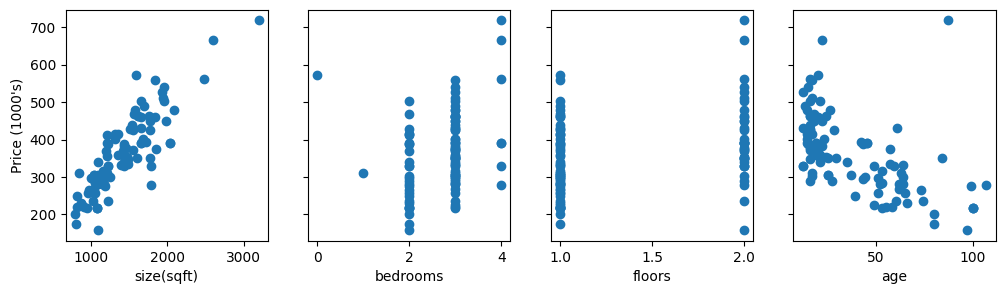

In [6]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [7]:
w_initial = np.zeros(X_train.shape[1])
b_initial = 0
_, _, hist = gradient_descent(X_train, y_train, w_initial, b_initial, 9e-7, 1000)

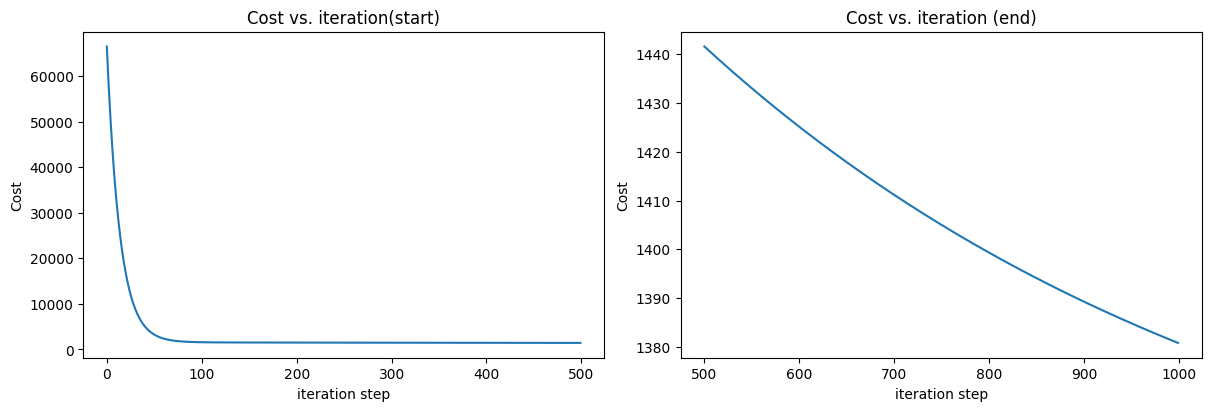

In [8]:
J_hist = hist["cost"]
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:500])
ax2.plot(500 + np.arange(len(J_hist[500:])), J_hist[500:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [9]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """

    # find the mean of each colum/feature
    mu = np.mean(X, axis=0)     # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma = np.std(X, axis=0)   # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

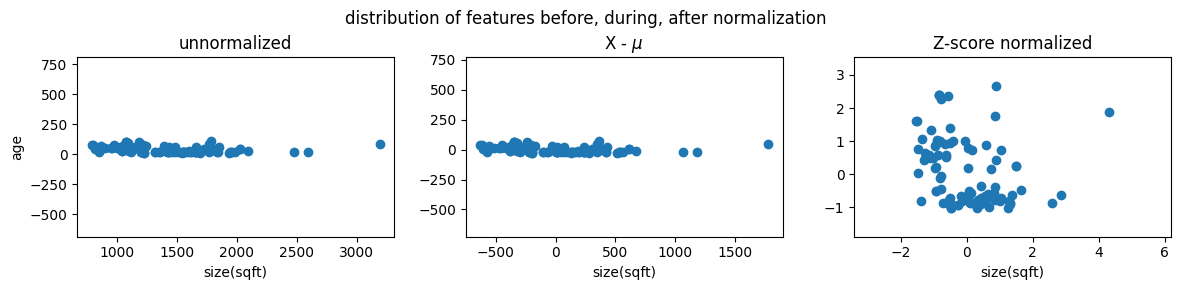

In [10]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [11]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.41837374e+03 2.71717172e+00 1.38383838e+00 3.83838384e+01], 
X_sigma = [411.61562893   0.65196523   0.48631932  25.77788069]
Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]


In [12]:
w_norm, b_norm, hist_norm = gradient_descent(X_norm, y_train, w_initial, b_initial, 1.0e-1, 1000)

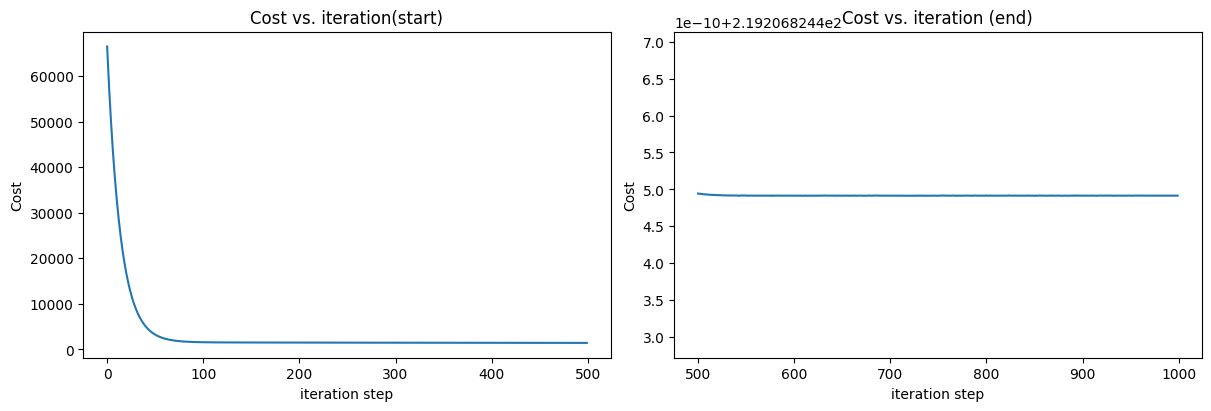

In [13]:
J_hist_norm = hist_norm["cost"]
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:500])
ax2.plot(500 + np.arange(len(J_hist_norm[500:])), J_hist_norm[500:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

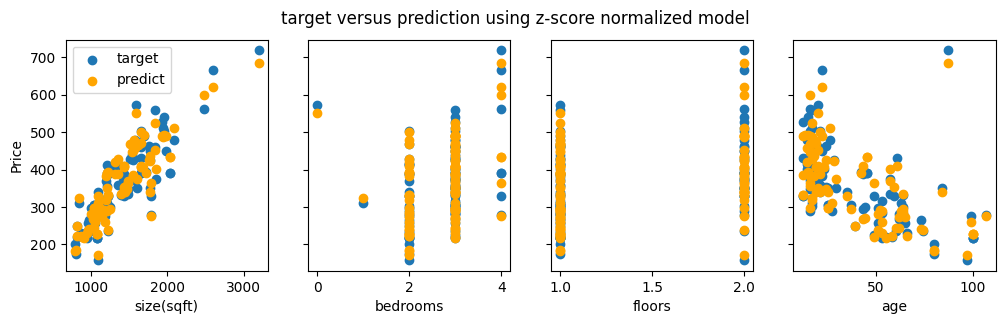

In [14]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

# plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()